# Fuzzy Logic
Fuzzy logic merupakan logika yang digunakan untuk menggambarkan ketidakjelasan (fuzziness). Teori himpunan fuzzy menyerupai penalaran manusia dalam penggunaan informasi perkiraan dan ketidakpastian untuk menghasilkan keputusan.

Dalam membangun fuzzy system, terdapat tiga proses utama, yaitu:

<img src="Asset/fuzzylogic_mainprocess.PNG"/>

#### Fuzzyfication
> Tranformasi input kedalam fuzzy values berdasarkan fungsi keanggotaannya.

#### Inference
> Menentukan output fuzzy menggunakan aturan yang telah dibuat.

#### Difuzzification
> Mengubah kembali nilai fuzzy output menjadi crisp value.

Dalam membangun Fuzzy system, akan dibagi kedalam empat tahapan, yaitu:

### Step 1: Determine the Input and Output

Desain variable linguistik untuk setiap input, dan output.

**Input:**
> Tes Kopetensi : **High, Average, Low**
> Kepribadian : **Upper, Middle, Bottom**

**Output:**
> IDDiterima : **Ya, Tidak**

### Step 2: Design the Membership Functions

##### a. Tes Kompetensi

> **Tinggi** : nilai > 73.5, nilai <= 68.5

> **Sedang** : nilai > 62.5, nilai < 72

> **Rendah** : nilai <= 52.5, nilai > 65

In [1]:
def tesKompetensiTinggi(nilai):
    hasil = 0
    if nilai <= 68.5:
        hasil = 0
    elif nilai > 73.5:
        hasil = 1
    else:
        hasil = (nilai-68.5)/(73.5-68.5)
    
    return hasil

In [2]:
def tesKompetensiRendah(nilai):
    hasil = 0
    if nilai <= 52.5:
        hasil = 1
    elif nilai > 65:
        hasil = 0
    else:
        hasil = (65-nilai)/(65-52.5)
    
    return hasil

In [3]:
def tesKompetensiSedang(nilai):
    hasil = 0
    if nilai <= 52.5 or nilai > 80:
        hasil = 0
    elif nilai > 52.5 and nilai <= 62.5:
        hasil = (nilai-52.5)/(62.5-52.5)
    elif nilai > 62.5 and nilai <= 72:
        hasil = 1
    else:
        hasil = (80-nilai)/(80-72)
    
    return hasil

In [4]:
def GraphTesKompetensi(my_data):
    plt.plot(my_data, [tesKompetensiRendah(x) for x in my_data], color='green', label='Low')
    plt.plot(my_data, [tesKompetensiSedang(x) for x in my_data], color='yellow', label='Average')
    plt.plot(my_data, [tesKompetensiTinggi(x) for x in my_data], color='blue', label='High')
    plt.title('Graph Tes Kopetensi', color='white')
    plt.legend()
    plt.show()

##### b. Kepribadian

> **Baik** : nilai > 73, nilai <= 65

> **Cukup** : nilai > 50, nilai < 60

> **Buruk** : nilai <= 40, nilai > 55

In [5]:
def kepribadianTinggi(nilai):
    hasil = 0
    if nilai <= 65:
        hasil = 0
    elif nilai > 73:
        hasil = 1
    else:
        hasil = (nilai-65)/(73-65)
    
    return hasil

In [6]:
def kepribadianRendah(nilai):
    hasil = 0
    if nilai <= 40:
        hasil = 1
    elif nilai > 55:
        hasil = 0
    else:
        hasil = (55-nilai)/(55-40)
    
    return hasil

In [7]:
def kepribadianSedang(nilai):
    hasil = 0
    if nilai <= 40 or nilai > 75:
        hasil = 0
    elif nilai > 40 and nilai <= 50:
        hasil = (nilai-40)/(50-40)
    elif nilai > 50 and nilai <= 60:
        hasil = 1
    else:
        hasil = (75-nilai)/(75-60)
    
    return hasil

In [8]:
def GraphKepribadian(my_data):
    plt.plot(my_data, [kepribadianRendah(x) for x in my_data], color='green', label='Buttom')
    plt.plot(my_data, [kepribadianSedang(x) for x in my_data], color='yellow', label='Middle')
    plt.plot(my_data, [kepribadianTinggi(x) for x in my_data], color='blue', label='Upper')
    plt.title('Graph Kepribadian', color='white')
    plt.legend()
    plt.show()

In [9]:
def fuzzification(data_kompetensi, data_kepribadian):
    kompetensi = {}
    kepribadian = {}
    
    kompetensi['high'] = tesKompetensiTinggi(data_kompetensi)
    kompetensi['average'] = tesKompetensiSedang(data_kompetensi)
    kompetensi['low'] = tesKompetensiRendah(data_kompetensi)
    
    kepribadian['upper'] = kepribadianTinggi(data_kepribadian)
    kepribadian['middle'] = kepribadianSedang(data_kepribadian)
    kepribadian['bottom'] = kepribadianRendah(data_kepribadian)
    
    return kompetensi, kepribadian

### Step 3: Design the Fuzzy Rules

Tetapkan aturan yang akan menentukan skor ```Diterima``` atau ```Ditolak``` berdasarkan Tes Kepribadian dan Kepribadian

| Tes Kompetensi | Kepribadina | IDDiterima |
| --- | --- | --- |
| High | Upper | Ya |
| High | Middle | Ya |
| High | Bottom | Tidak |
| Average | Upper | Ya |
| Average | Middle | Ya |
| Average | Bottom | Tidak |
| Low | Upper | Ya |
| Low | Middle | Tidak |
| Low | Bottom | Tidak |


**1. Conjunction Rule**

Dengan menggunakan teknik ```clipping```, aturan konjungsi akan mendapatkan nilai minimum input fuzzy sebagai output fuzzy.

**2. Disjunction Rule**

Dengan menggunakan aturan disjuction, dapatkan value maksimum dari setiap fuzzy output

In [10]:
def inference(kompetensi, kepribadian):
    score_ya = []
    score_tidak = []
    
    conjunction_rule = [
        [min(kompetensi['high'], kepribadian['upper']), 'Ya'],
        [min(kompetensi['high'], kepribadian['middle']), 'Ya'],
        [min(kompetensi['high'], kepribadian['bottom']), 'Tidak'],
        [min(kompetensi['average'], kepribadian['upper']), 'Ya'],
        [min(kompetensi['average'], kepribadian['middle']), 'Ya'],
        [min(kompetensi['average'], kepribadian['bottom']), 'Tidak'],
        [min(kompetensi['low'], kepribadian['upper']), 'Ya'],
        [min(kompetensi['low'], kepribadian['middle']), 'Tidak'],
        [min(kompetensi['low'], kepribadian['bottom']), 'Tidak']
    ]
    for i in range(len(conjunction_rule)):
        if conjunction_rule[i][1] == 'Ya':
            score_ya.append(conjunction_rule[i][0])
        else:
            score_tidak.append(conjunction_rule[i][0])
            
    return max(score_ya), max(score_tidak)

### Step 4: Choose Defuzzification Method

Metode yang biasanya digunakan dalam mengubah fuzzy set kedalam crisp set ada dua, yaitu:
* Center of Gravity (Mamdany-style)

<img src="Asset/mamdani.PNG"/>

* Constant Defuzzification (Takagi-Sugeno-Style)

<img src="Asset/sugeno.PNG"/>


In [11]:
def sugeno_defuzzification(score_ya, score_tidak):
    const_tidak = 50
    const_ya = 100
    
    return (((score_ya*const_ya)+(score_tidak*const_tidak))/(score_ya+score_tidak))

* **Mengubah Crisp Data Kedalam Linguistic**

In [12]:
def ubahHasilDefuzzification(hasil_defuzzification):
    hasil_idditerima = []
    for i in hasil_defuzzification:
        if i < 100:
            hasil_idditerima.append('Tidak')
        else:
            hasil_idditerima.append('Ya')
            
    return hasil_idditerima

* **Menghitung Akurasi**

In [13]:
def getAccuracy(hasil_idditerima, data_score_csv):
    hasil_sama = 0
    for i in range(len(hasil_idditerima)):
        if hasil_idditerima[i] == data_score_csv[i]:
            hasil_sama += 1
            
    return (hasil_sama/len(hasil_idditerima))*100

# Melakukan Komputasi Terhadap Input CSV

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

In [15]:
my_data_csv = pd.read_csv('data_tugas3.csv')

my_data_csv.head()

,ID,Tes Kompetensi,Kepribadian,IDDiterima
0,P1,61.0,37.5,Tidak
1,P2,71.0,58.3,Ya
2,P3,64.0,35.8,Tidak
3,P4,60.0,51.7,Tidak
4,P5,73.5,75.0,Ya


In [16]:
my_data_kompetensi = my_data_csv['Tes Kompetensi'][:20]
my_data_kepribadian = my_data_csv['Kepribadian'][:20]

### ~ Plot Membership Fuctions

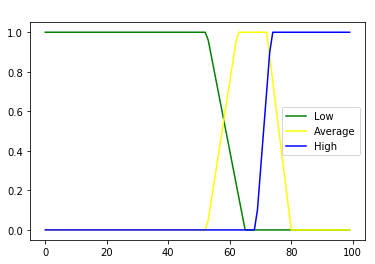

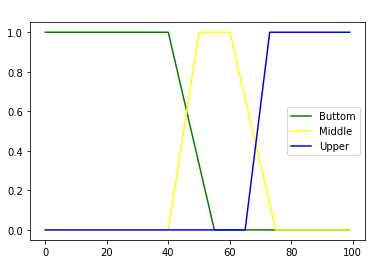

In [17]:
GraphTesKompetensi(np.arange(0,100,1))
GraphKepribadian(np.arange(0,100,1))

### ~ Melakukan Validasi Terhadap Data yang Sudah Terisi

In [18]:
hasil_defuzzification = []

for i in range(len(my_data_kompetensi)):
    fuzz1, fuzz2 = fuzzification(my_data_kompetensi[i], my_data_kepribadian[i])
    score_ya, score_tidak = inference(fuzz1, fuzz2)
    hasil_defuzzification.append(sugeno_defuzzification(score_ya, score_tidak))

In [19]:
hasil_idditerima = ubahHasilDefuzzification(hasil_defuzzification)

In [20]:
print('Pediksi Fuzzy \t||  Data Sebenarnya')
for i in range(len(hasil_idditerima)):
    print(i+1, ' ', hasil_idditerima[i], ' \t|| \t', my_data_csv['IDDiterima'][i])

Pediksi Fuzzy 	||  Data Sebenarnya
1   Tidak  	|| 	 Tidak
2   Ya  	|| 	 Ya
3   Tidak  	|| 	 Tidak
4   Tidak  	|| 	 Tidak
5   Ya  	|| 	 Ya
6   Ya  	|| 	 Ya
7   Tidak  	|| 	 Tidak
8   Tidak  	|| 	 Tidak
9   Tidak  	|| 	 Tidak
10   Ya  	|| 	 Ya
11   Ya  	|| 	 Ya
12   Ya  	|| 	 Ya
13   Tidak  	|| 	 Tidak
14   Tidak  	|| 	 Tidak
15   Tidak  	|| 	 Tidak
16   Tidak  	|| 	 Tidak
17   Ya  	|| 	 Ya
18   Tidak  	|| 	 Tidak
19   Ya  	|| 	 Ya
20   Ya  	|| 	 Ya


In [21]:
print('=====================')
print('Accuracy : ', getAccuracy(hasil_idditerima, my_data_csv['IDDiterima'][:20]), '%')
print('=====================')

Accuracy :  100.0 %


### ~ Mengolah IDDiterima yang Masih Kosong

In [22]:
data_kompetensi = my_data_csv['Tes Kompetensi']
data_kepribadian = my_data_csv['Kepribadian']

In [23]:
hasil_defuzzification = []

for i in range(20, len(data_kompetensi)):
    fuzz1, fuzz2 = fuzzification(data_kompetensi[i], data_kepribadian[i])
    score_ya, score_tidak = inference(fuzz1, fuzz2)
    hasil_defuzzification.append(sugeno_defuzzification(score_ya, score_tidak))

In [24]:
hasil_idditerima = ubahHasilDefuzzification(hasil_defuzzification)

### ~ Menyimpan Hasil Perhitungan Kedalam CSV

In [25]:
my_data_csv['IDDiterima'][20:] = hasil_idditerima
my_data_csv[20:].to_csv('TebakanTugas3.csv')

C:\Users\babyanaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### ~ Menampilkan Hasil CSV Setelah Penambahan

In [26]:
my_data_hasil = pd.read_csv('TebakanTugas3.csv')
my_data_hasil = my_data_hasil.drop(columns=['Unnamed: 0'])

In [27]:
my_data_hasil

,ID,Tes Kompetensi,Kepribadian,IDDiterima
0,P21,61.5,52.5,Tidak
1,P22,66.5,58.3,Ya
2,P23,71.0,45.8,Tidak
3,P24,64.5,55.0,Tidak
4,P25,57.5,79.2,Ya
5,P26,80.0,45.8,Tidak
6,P27,81.5,53.3,Tidak
7,P28,61.0,64.2,Tidak
8,P29,46.0,65.8,Tidak
9,P30,78.0,49.2,Tidak
